# Propagating error in 2 very generic ways using Monte Carlo approaches
- The functions show in these notebooks were developed for PySulfSat. However, they can be used for any application - there is no requirement for the columns to have certain names. They work equally well for 'Al2O3_Liq' as 'Height_of_dog'

## First, import required packages

In [2]:
import numpy as np
import pandas as pd
import PySulfSat as ss
import matplotlib.pyplot as plt

## Option 1 - Load in two dataframes
- The easiest way to do Monte Carlo simulations is to have two dataframes. The first dataframe has the preferred values for each column (df1)
- The second dataframe (df2) has the errors for each column in df1. This function only works if you have exactly the same columns in df1 and df2, where the columns in df2 have the suffix '_Err' after them. This requirement saves confusion about what is and isn't having noise added to it

In [3]:
df1 = pd.read_excel('Noise_example.xlsx', sheet_name='var')
df1.head()

,Sample_ID,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K
0,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0000,1293.15
1,Feig2010_2,53.642629,0.617371,19.320971,4.884986,0,3.257343,6.824314,5.057043,0,0,0,5.18,0.2,0,0,0,1.0230,1253.15
2,Feig2010_3,49.629083,0.365787,19.103075,5.302860,0,6.403377,11.615943,3.275783,0,0,0,5.05,0.2,0,0,0,1.0170,1333.15
3,Feig2010_4,51.624314,0.443871,18.451100,6.303071,0,6.132229,10.365057,3.685714,0,0,0,2.67,0.2,0,0,0,0.9945,1373.15
4,Feig2010_5,53.980586,0.817471,17.454986,6.744429,0,5.149100,9.030871,4.179543,0,0,0,2.25,0.2,0,0,0,0.9945,1373.15


- df2 can either be absolute errors, or percentage errors, here we show how to do both

In [5]:
df2a= pd.read_excel('Noise_example.xlsx', sheet_name='err_Abs')
df2a.head()

,Sample_ID,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar_Err,T_K_Err
0,Feig2010_1,0.326030,0.042448,0.221884,0.432684,0,0.207011,0.268045,0.213647,0,0,0,0.2560,0.02,0,0,0,0.1,50
1,Feig2010_2,0.328698,0.025182,0.242675,0.214755,0,0.163292,0.171717,0.085388,0,0,0,0.2590,0.02,0,0,0,0.1,50
2,Feig2010_3,0.476011,0.027083,0.235814,0.301696,0,0.174436,0.206030,0.229583,0,0,0,0.2525,0.02,0,0,0,0.1,50
3,Feig2010_4,0.442894,0.047517,0.234808,0.219780,0,0.171799,0.274484,0.259757,0,0,0,0.1335,0.02,0,0,0,0.1,50
4,Feig2010_5,0.445356,0.043963,0.316155,0.389311,0,0.134659,0.209045,0.453723,0,0,0,0.1125,0.02,0,0,0,0.1,50


In [6]:
df2b=pd.read_excel('Noise_example.xlsx', sheet_name='err_Perc')
df2b

,Sample_ID,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar_Err,T_K_Err
0,Feig2010_1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,Feig2010_2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,Feig2010_3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,Feig2010_4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,Feig2010_5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,Feig2010_6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
6,Feig2010_7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


## Now we mix these dataframes
- This function takes df1, and duplicates each row 500 times. For each column, it adds noise based on the absolute error values in df2a, normally distributed in this case

In [5]:
df_noisy_abs=ss.add_noise_2_dataframes(df_values=df1, df_err=df2a, 
        error_type="Abs", error_dist="normal", N_dups=500)
df_noisy_abs.head()

columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,Sample_ID
0,51.144349,0.495802,19.165669,5.316576,0.0,4.726400,9.198788,4.198823,0.0,0.0,0.0,4.860532,0.210544,0.0,0.0,0.0,1.058683,1276.077075,Feig2010_1
1,51.086793,0.456929,19.389308,5.427214,0.0,4.359955,9.395707,4.205094,0.0,0.0,0.0,4.883362,0.183837,0.0,0.0,0.0,1.014526,1337.423381,Feig2010_1
2,50.732787,0.487510,19.646907,5.095297,0.0,4.826940,8.989661,4.536460,0.0,0.0,0.0,4.718288,0.182681,0.0,0.0,0.0,1.004529,1297.473685,Feig2010_1
3,51.202213,0.482808,19.200385,6.357632,0.0,4.973543,9.289463,4.389050,0.0,0.0,0.0,5.086903,0.181316,0.0,0.0,0.0,1.056102,1297.612354,Feig2010_1
4,50.524310,0.530324,19.563533,4.779907,0.0,4.605723,8.640113,4.379560,0.0,0.0,0.0,5.024431,0.226703,0.0,0.0,0.0,1.121638,1243.503680,Feig2010_1


- If we use the % errors instead, we just have to say that they are % errors (error_type='Perc')

In [7]:
df_noisy_perc=ss.add_noise_2_dataframes(df_values=df1, df_err=df2b, 
        error_type="Perc", error_dist="normal", N_dups=100)
df_noisy_perc.head()

columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,Sample_ID
0,53.539556,0.501550,20.385949,4.897488,0.0,4.665786,8.549823,4.159073,0.0,0.0,0.0,4.974438,0.207821,0.0,0.0,0.0,0.984508,1345.496332,Feig2010_1
1,50.205442,0.506797,19.322965,5.537528,0.0,4.467927,9.293633,4.329560,0.0,0.0,0.0,5.232322,0.200164,0.0,0.0,0.0,1.025102,1396.269410,Feig2010_1
2,52.382512,0.507524,20.353512,5.457902,0.0,4.604061,9.831166,4.210873,0.0,0.0,0.0,4.698120,0.200741,0.0,0.0,0.0,0.991817,1262.011076,Feig2010_1
3,49.190897,0.453467,20.662706,5.559547,0.0,4.337380,8.814303,4.298971,0.0,0.0,0.0,5.369742,0.192026,0.0,0.0,0.0,0.988332,1210.071885,Feig2010_1
4,46.510958,0.470826,19.495140,5.426539,0.0,4.453443,8.833938,3.920247,0.0,0.0,0.0,4.744528,0.196926,0.0,0.0,0.0,0.952388,1361.648899,Feig2010_1


## Lets inspect the outputs to convince ourselves this has done the right thing!

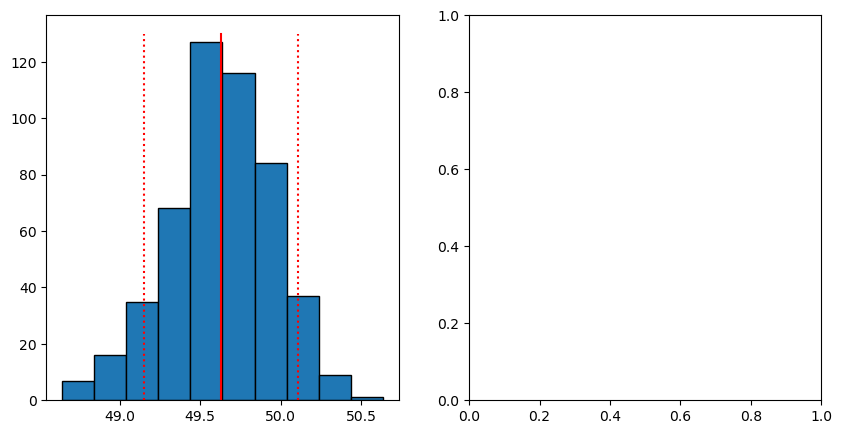

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sam='Feig2010_3'

var1='SiO2_Liq'
ax1.hist(df_noisy_abs[var1].loc[df_noisy_abs['Sample_ID']==sam], ec='k')
ax1.plot([df1[var1.loc[df1['Sample_ID']==sam], df1['SiO2_Liq'].loc[df1['Sample_ID']==sam]],
         [0, 130], '-r')
ax1.plot([df2[var1].loc[df2['Sample_ID']==sam]+df1['SiO2_Liq'].loc[df1['Sample_ID']==sam], 
          df2[var1].loc[df1['Sample_ID']==sam]+df1['SiO2_Liq'].loc[df1['Sample_ID']==sam]],
         [0, 130], ':r')
ax1.plot([-df2[var1].loc[df2['Sample_ID']==sam]+df1['SiO2_Liq'].loc[df1['Sample_ID']==sam], 
          -df2[var1].loc[df1['Sample_ID']==sam]+df1['SiO2_Liq'].loc[df1['Sample_ID']==sam]],
         [0, 130], ':r')

## ONeill s6+ method
- ONeill and Mavrogenes (2022) point out that Cs6 is very sensitive to input oxide variations
- Here lets use the perc error example, where just for simplicity, we assume every oxide has a 5% error, but Fe3Fet_Liq has a 10% error

In [8]:
noisy_ONeill_S6St=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Liq'],
                                          T_K=df_noisy_abs['T_K'])
noisy_ONeill_S6St.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.826372,-5.650001,16.051330,-23.381138,1.560130,1.602027,51.144349,0.495802,19.165669,5.316576,...,0.095141,0.218044,0.078585,0.0,0.003600,0.0,0.613102,0.667474,-9.450756,0.033883
1,0.617021,-4.933672,14.966482,-21.400937,0.476924,1.287291,51.086793,0.456929,19.389308,5.427214,...,0.097228,0.220703,0.078743,0.0,0.003319,0.0,0.588816,0.636964,-8.864855,0.035777
2,0.588266,-5.426184,15.805174,-22.669044,0.356803,1.273610,50.732787,0.487510,19.646907,5.095297,...,0.092491,0.222350,0.084460,0.0,0.003521,0.0,0.628067,0.673851,-9.455372,0.033443
3,0.520738,-5.152401,15.823004,-22.664506,0.082998,1.268655,51.202213,0.482808,19.200385,6.357632,...,0.094443,0.214720,0.080747,0.0,0.003446,0.0,0.582371,0.630082,-9.458264,0.041302
4,0.906028,-6.178123,16.646530,-24.512619,2.266079,1.780038,50.524310,0.530324,19.563533,4.779907,...,0.090235,0.224744,0.082768,0.0,0.003888,0.0,0.632025,0.689548,-9.787085,0.030130


In [10]:
import Thermobar as pt
Stats_S6=pt.av_noise_samples_series(calc=noisy_ONeill_S6St['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID'])
Stats_S6

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,Feig2010_1,500,0.700433,0.745453,0.194322,0.990157,0.094823
1,Feig2010_2,500,0.725546,0.772182,0.187878,0.975312,0.053307
2,Feig2010_3,500,0.726731,0.765586,0.179925,0.983772,0.092684
3,Feig2010_4,500,0.774402,0.813464,0.164697,0.983028,0.121435
4,Feig2010_5,500,0.773364,0.824594,0.172981,0.986403,0.136869
5,Feig2010_6,500,0.791603,0.838846,0.157923,0.992396,0.144263
6,Feig2010_7,500,0.850439,0.887202,0.126614,0.990286,0.295994


In [22]:
type(num_cols)

list

In [ ]:
df=

In [19]:
noise

array([0.00908739, 0.00727401, 0.00320163, 0.00977372, 0.02938229,
       0.01302366, 0.02680615, 0.0393372 , 0.02630201])

In [21]:
noisy_array.T

array([[2.62175073e+00, 5.89600195e+00, 1.33652031e+01, 5.09353320e+01,
        1.65776957e-01, 1.08158747e+01, 2.46187124e+00, 2.48546245e-01,
        1.42135410e+01, 1.30000475e+03, 9.08739308e-03],
       [2.63319303e+00, 5.87982127e+00, 1.33623415e+01, 5.09229326e+01,
        1.84394138e-01, 1.08302775e+01, 2.44917501e+00, 2.57420863e-01,
        1.42039427e+01, 1.30000654e+03, 7.27400508e-03],
       [2.62193689e+00, 5.86020310e+00, 1.33620479e+01, 5.09386461e+01,
        1.48733027e-01, 1.08233779e+01, 2.46663304e+00, 2.25488453e-01,
        1.42106200e+01, 1.30000135e+03, 3.20162810e-03],
       [2.79582990e+00, 5.62524165e+00, 1.33103964e+01, 5.00148935e+01,
        2.67282922e-01, 1.05062733e+01, 2.72916904e+00, 2.56254268e-01,
        1.46734548e+01, 1.40000147e+03, 9.77372393e-03],
       [2.78611233e+00, 5.63043967e+00, 1.33027434e+01, 5.00100229e+01,
        2.74758258e-01, 1.05046981e+01, 2.74976655e+00, 2.41186264e-01,
        1.46627036e+01, 1.40000776e+03, 2.93822898e-

In [ ]:
Fe3Fet=df1['Fe3Fet_Liq']
Fe3Fet_err=ss.add_noise_series(var=Fe3Fet, error_var=0.01, error_type="Abs", error_dist="normal", N_dup=3)
Fe3Fet_err

In [ ]:
# Load your original dataframes
df1 = pd.read_excel('Noise_example.xlsx', sheet_name='var')
df1_nostrings=df1.select_dtypes(exclude=['object'])
df2= pd.read_excel('Noise_example.xlsx', sheet_name='err')
df2_nostrings=df1.select_dtypes(exclude=['object'])
df2.columns = [col[:-4] if col.endswith('_Err') else col for col in df2.columns]
df2 = df2[df1.columns]  # Reorder the columns to match df1


In [ ]:
np.shape(df1)

In [ ]:
df1

In [ ]:
np.shape(df2)

In [ ]:
df2

In [ ]:
# Create a new dataframe to store the noisy data
n_duplicates = 1000
n_rows = len(df1) * n_duplicates
cols = df1.columns
df_noisy = pd.DataFrame(index=range(n_rows), columns=cols)

# Create a 2D array to store the noise
noise_array = np.zeros((len(df1), n_duplicates, len(cols)), dtype=float)
for j, col in enumerate(cols):
    if df1[col].dtype == 'object':  # Check if column contains strings
        noise_array[:, :, j] = np.nan
    else:
        noise = np.random.normal(loc=0, scale=df2[col].values, size=(n_duplicates, len(df1)))
        noise_array[:, :, j] = noise.T

# Vectorize the noisy data generation
df1_array = df1.values
for j in range(n_duplicates):
    idx_start = j * len(df1)
    idx_end = idx_start + len(df1)
    df_noisy.loc[idx_start:idx_end-1, :] = df1_array + noise_array[:, j, :].reshape(-1, len(cols))

# Concatenate the original and noisy dataframes
df_combined = pd.concat([df1, df_noisy], axis=1)

In [ ]:
df_noisy

In [ ]:

# Loop through each row of the original dataframes
N_dup=10
df_noisy = pd.DataFrame(columns=df1.columns)
for i, row in df1.iterrows():
    print(i)

    # Loop through 1000 duplicates of the current row
    for j in range(N_dup):

        # Add the noise to the original row
        row_noisy = row.copy()  # Make a copy of the original row
        for col in row.index:
            if isinstance(row[col], str):
                continue  # Skip string columns
            noise = np.random.normal(loc=0, scale=df2.loc[i, col], size=1)[0]  # Generate noise for this column
            row_noisy[col] += noise

        # Append the new row to the noisy dataframe
        df_noisy = pd.concat([df_noisy, row_noisy], ignore_index=True)

# Concatenate the original and noisy dataframes
df_combined = pd.concat([df1, df_noisy], axis=1)

In [ ]:
df_combined

In [ ]:
Fe3Fet_var=ss.add_noise_series(var=Fe3Fet, error_var=0.01, error_type="Abs", error_dist="normal", N_dup=1000)


In [ ]:
noise_Fe3Fet=ss.add_noise_1var(var=Fe3Fet, error_var=0.01, error_type='Abs', error_dist='normal', N_dup=10)
#plt.hist(noise_Fe3Fet, bins=100);
noise_Fe3Fet